In [1]:
import pandas as pd

df = pd.read_csv('C:/Users/gregorio/TCC-CD-USP/archives/df_model.csv')
df.head()

,companycode,ano,amortization,ativos_circulantes,caixa_e_equivalentes_de_caixa,contas_a_receber,cogs,despesas_financeiras,dívidas_financeiras,estoques,...,lucros_retidos_sobre_ativos,razao_posicao_cambial,crescimento_vendas,crescimento_ativos,crescimento_lucro_liquido,ebitda.1,margem_ebitda,ebitda_sobre_juros,ebitda_sobre_divida,total_score
0,ADEL,2008,21570757.0,45582654.0,12278966.0,1732209.5,-36969117.0,-4467984.0,1732469.5,13475416.0,...,0.189012,-0.032546,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,6.326190
1,ADEL,2009,21570757.0,45582654.0,12278966.0,1732209.5,-36969117.0,-4467984.0,1732469.5,13475416.0,...,0.189012,-0.032546,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,6.326190
2,ADEL,2010,21570757.0,58621451.0,23356948.0,2596836.0,-45050840.0,-2562968.0,1451071.5,12923503.0,...,0.250811,-0.027382,0.173849,0.202340,0.210271,NaN,0.0,0.0,0.0,6.926190
3,ADEL,2011,21570757.0,75550839.0,32365348.0,4467178.5,-56331016.0,-2482437.0,1881790.0,13891455.5,...,0.294988,0.034318,0.268765,0.246222,0.309325,NaN,0.0,0.0,0.0,7.376190
4,ADEL,2012,21570757.0,93484162.0,9840553.0,8249453.0,-68996586.0,-4188750.0,2152682.5,27333673.5,...,0.341168,0.020738,0.222102,0.223090,0.194568,NaN,0.0,0.0,0.0,7.392857


In [2]:
#df=df.drop(columns=['ebitda'],axis=1)

In [3]:
df.isnull().sum()

companycode                                         0
ano                                                 0
amortization                                        0
ativos_circulantes                                  0
caixa_e_equivalentes_de_caixa                       0
contas_a_receber                                    0
cogs                                                0
despesas_financeiras                                0
dívidas_financeiras                                 0
estoques                                            0
ebit                                                0
lucro_liquido_op_continuas                          0
lucro_bruto_prejuízo_de_atividades_comerciais       0
lucro_prejuízo_líquido_do_período                   0
lucro_prejuízo_operacional_líquido                  0
lucros_prejuízos_acumulados                         0
outros_ativos_circulantes                           0
passivos_circulantes                                0
patrimônio_líquido          

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# Corr

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Mapa de correlação das features.

df_corr = df.copy()
df_corr = df_corr.drop(columns=['companycode', 'ano'])

In [6]:
# Calculate correlation matrix
corr_matrix = df_corr.corr()

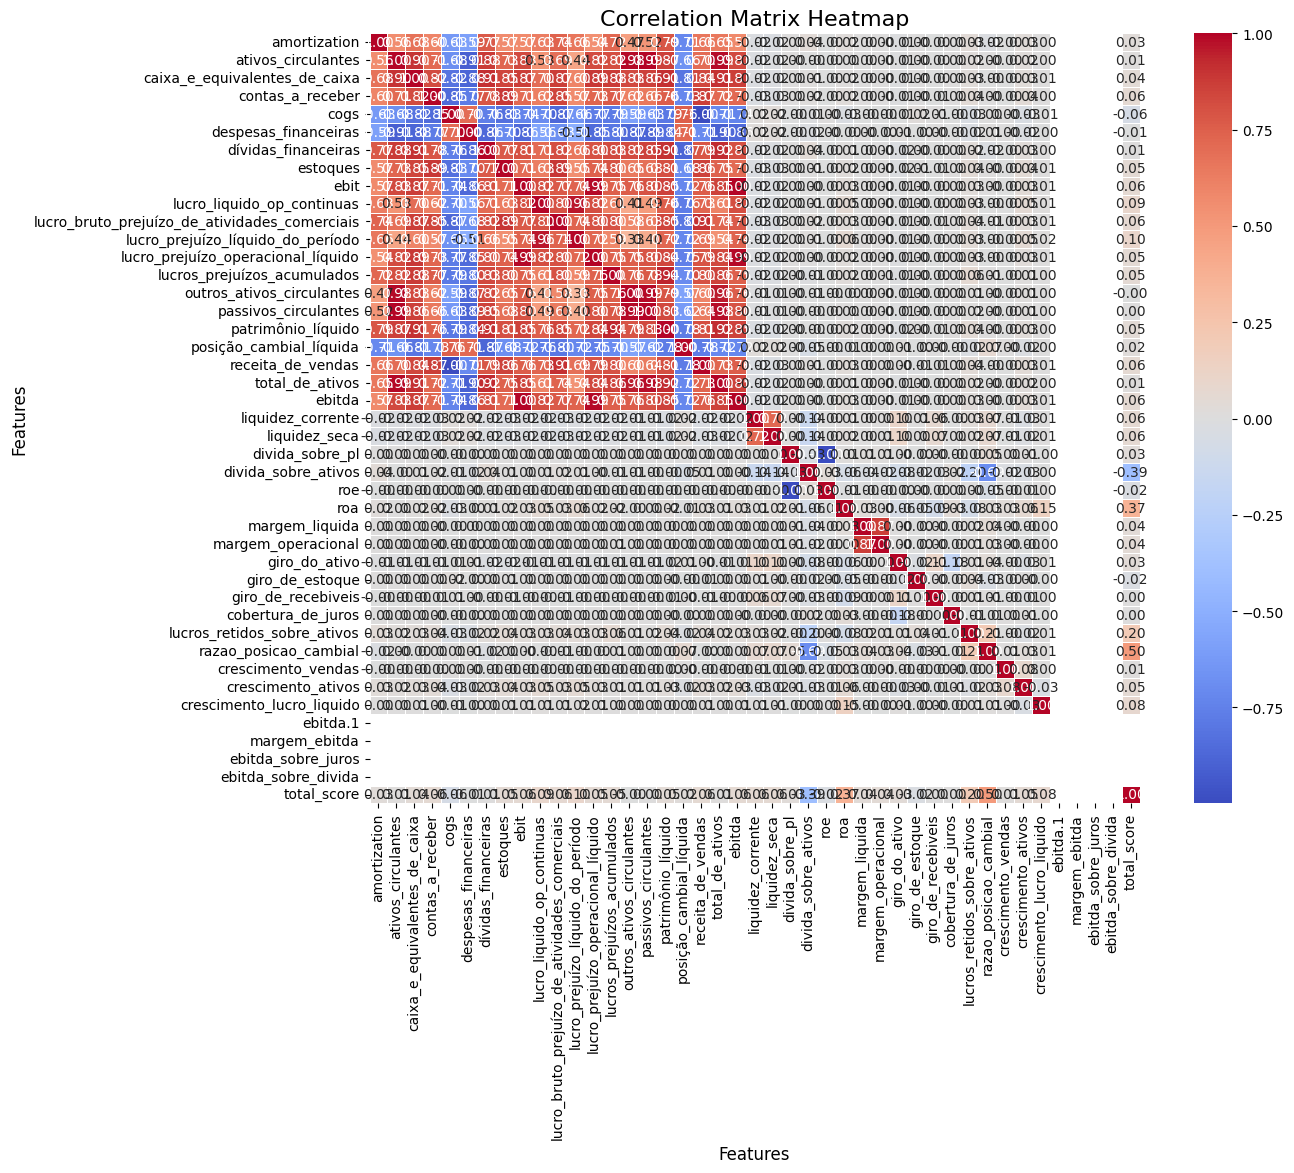

In [7]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True, linewidths=.5)

# Titles and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

plt.show()

In [8]:
corrs=corr_matrix.loc['total_score'].drop('total_score').sort_values(ascending=False)
corrs

razao_posicao_cambial                            0.495007
roa                                              0.367365
lucros_retidos_sobre_ativos                      0.201561
lucro_prejuízo_líquido_do_período                0.098219
lucro_liquido_op_continuas                       0.088901
crescimento_lucro_liquido                        0.078295
lucro_bruto_prejuízo_de_atividades_comerciais    0.063817
contas_a_receber                                 0.061095
liquidez_corrente                                0.060029
ebitda                                           0.059946
ebit                                             0.059946
receita_de_vendas                                0.058107
liquidez_seca                                    0.056765
estoques                                         0.053677
lucro_prejuízo_operacional_líquido               0.051110
crescimento_ativos                               0.050338
lucros_prejuízos_acumulados                      0.047354
patrimônio_líq

In [9]:
import phik
from phik import resources, report
phi_k_corr = df_corr.phik_matrix()

interval columns not set, guessing: ['amortization', 'ativos_circulantes', 'caixa_e_equivalentes_de_caixa', 'contas_a_receber', 'cogs', 'despesas_financeiras', 'dívidas_financeiras', 'estoques', 'ebit', 'lucro_liquido_op_continuas', 'lucro_bruto_prejuízo_de_atividades_comerciais', 'lucro_prejuízo_líquido_do_período', 'lucro_prejuízo_operacional_líquido', 'lucros_prejuízos_acumulados', 'outros_ativos_circulantes', 'passivos_circulantes', 'patrimônio_líquido', 'posição_cambial_líquida', 'receita_de_vendas', 'total_de_ativos', 'ebitda', 'liquidez_corrente', 'liquidez_seca', 'divida_sobre_pl', 'divida_sobre_ativos', 'roe', 'roa', 'margem_liquida', 'margem_operacional', 'giro_do_ativo', 'giro_de_estoque', 'giro_de_recebiveis', 'cobertura_de_juros', 'lucros_retidos_sobre_ativos', 'razao_posicao_cambial', 'crescimento_vendas', 'crescimento_ativos', 'crescimento_lucro_liquido', 'ebitda.1', 'margem_ebitda', 'ebitda_sobre_juros', 'ebitda_sobre_divida', 'total_score']


c:\Users\gregorio\TCC-CD-USP\venv\Lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable ebitda.1 for analysis 0. Dropping this column
  warnings.warn(
c:\Users\gregorio\TCC-CD-USP\venv\Lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable margem_ebitda for analysis 1. Dropping this column
  warnings.warn(
c:\Users\gregorio\TCC-CD-USP\venv\Lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable ebitda_sobre_juros for analysis 1. Dropping this column
  warnings.warn(
c:\Users\gregorio\TCC-CD-USP\venv\Lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable ebitda_sobre_divida for analysis 1. Dropping this column
  warnings.warn(


In [10]:
phi_k_corr

,amortization,ativos_circulantes,caixa_e_equivalentes_de_caixa,contas_a_receber,cogs,despesas_financeiras,dívidas_financeiras,estoques,ebit,lucro_liquido_op_continuas,...,giro_do_ativo,giro_de_estoque,giro_de_recebiveis,cobertura_de_juros,lucros_retidos_sobre_ativos,razao_posicao_cambial,crescimento_vendas,crescimento_ativos,crescimento_lucro_liquido,total_score
amortization,1.000000,0.762267,0.843003,0.802253,0.817078,0.817255,0.866505,0.775336,0.778372,0.825303,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ativos_circulantes,0.762267,1.000000,0.958633,0.818708,0.818091,0.906584,0.907444,0.935279,0.853719,0.805383,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
caixa_e_equivalentes_de_caixa,0.843003,0.958633,1.000000,0.895562,0.840063,0.899652,0.870531,0.947743,0.897646,0.850481,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
contas_a_receber,0.802253,0.818708,0.895562,1.000000,0.877196,0.861485,0.923978,0.876431,0.945004,0.781792,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cogs,0.817078,0.818091,0.840063,0.877196,1.000000,0.904686,0.863993,0.891985,0.843796,0.937062,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
despesas_financeiras,0.817255,0.906584,0.899652,0.861485,0.904686,1.000000,0.847227,0.802796,0.874034,0.925705,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dívidas_financeiras,0.866505,0.907444,0.870531,0.923978,0.863993,0.847227,1.000000,0.835404,0.946457,0.881246,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
estoques,0.775336,0.935279,0.947743,0.876431,0.891985,0.802796,0.835404,1.000000,0.817758,0.806986,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ebit,0.778372,0.853719,0.897646,0.945004,0.843796,0.874034,0.946457,0.817758,1.000000,0.907902,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
lucro_liquido_op_continuas,0.825303,0.805383,0.850481,0.781792,0.937062,0.925705,0.881246,0.806986,0.907902,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019062


In [11]:
phik_corrs=phi_k_corr.loc['total_score'].drop('total_score').sort_values(ascending=False)
phik_corrs

razao_posicao_cambial                            0.417253
divida_sobre_ativos                              0.333620
roa                                              0.206380
lucros_retidos_sobre_ativos                      0.124950
margem_operacional                               0.107099
crescimento_lucro_liquido                        0.103409
lucro_prejuízo_líquido_do_período                0.090533
margem_liquida                                   0.080058
roe                                              0.078293
divida_sobre_pl                                  0.078293
crescimento_ativos                               0.075084
lucro_liquido_op_continuas                       0.019062
ativos_circulantes                               0.000000
amortization                                     0.000000
despesas_financeiras                             0.000000
cogs                                             0.000000
contas_a_receber                                 0.000000
caixa_e_equiva

-----

# MODEL

In [12]:
# Features and target
X = df.drop(columns=['total_score','companycode','ano'])
y = df['total_score']

In [13]:
X.columns.to_list()

['amortization',
 'ativos_circulantes',
 'caixa_e_equivalentes_de_caixa',
 'contas_a_receber',
 'cogs',
 'despesas_financeiras',
 'dívidas_financeiras',
 'estoques',
 'ebit',
 'lucro_liquido_op_continuas',
 'lucro_bruto_prejuízo_de_atividades_comerciais',
 'lucro_prejuízo_líquido_do_período',
 'lucro_prejuízo_operacional_líquido',
 'lucros_prejuízos_acumulados',
 'outros_ativos_circulantes',
 'passivos_circulantes',
 'patrimônio_líquido',
 'posição_cambial_líquida',
 'receita_de_vendas',
 'total_de_ativos',
 'ebitda',
 'liquidez_corrente',
 'liquidez_seca',
 'divida_sobre_pl',
 'divida_sobre_ativos',
 'roe',
 'roa',
 'margem_liquida',
 'margem_operacional',
 'giro_do_ativo',
 'giro_de_estoque',
 'giro_de_recebiveis',
 'cobertura_de_juros',
 'lucros_retidos_sobre_ativos',
 'razao_posicao_cambial',
 'crescimento_vendas',
 'crescimento_ativos',
 'crescimento_lucro_liquido',
 'ebitda.1',
 'margem_ebitda',
 'ebitda_sobre_juros',
 'ebitda_sobre_divida']

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Build da pipeline Linear Regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

In [16]:
# Fit model
print('Treinando o modelo')
pipeline.fit(X_train, y_train)
print('Modelo treinado com sucesso!')

Treinando o modelo
Modelo treinado com sucesso!


c:\Users\gregorio\TCC-CD-USP\venv\Lib\site-packages\sklearn\impute\_base.py:590: FutureWarning: Currently, when `keep_empty_feature=False` and `strategy="constant"`, empty features are not dropped. This behaviour will change in version 1.8. Set `keep_empty_feature=True` to preserve this behaviour.
  warnings.warn(


In [17]:
# Predictions
y_pred = pipeline.predict(X_test)

In [18]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

In [19]:
# Results summary
metrics = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'MAPE': mape,
    'R²': r2
}

In [20]:
# Display results
metrics_df = pd.DataFrame([metrics])
metrics_df

,MAE,MSE,RMSE,MAPE,R²
0,0.761009,1.114011,1.055467,19.367504,0.292384


In [21]:
# Residuals
residuals = y_test - y_pred

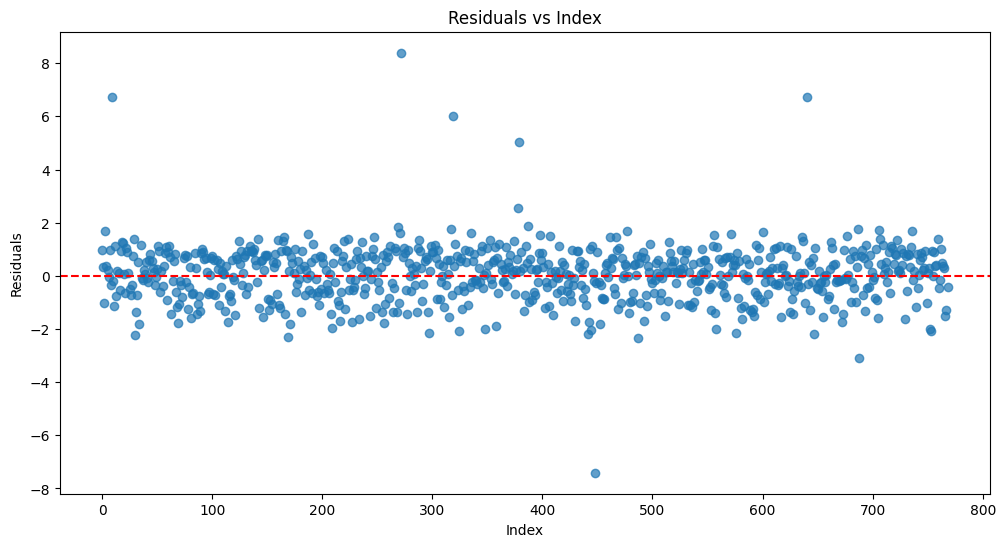

In [22]:
# Plot residuals vs index
plt.figure(figsize=(12, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Index')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()


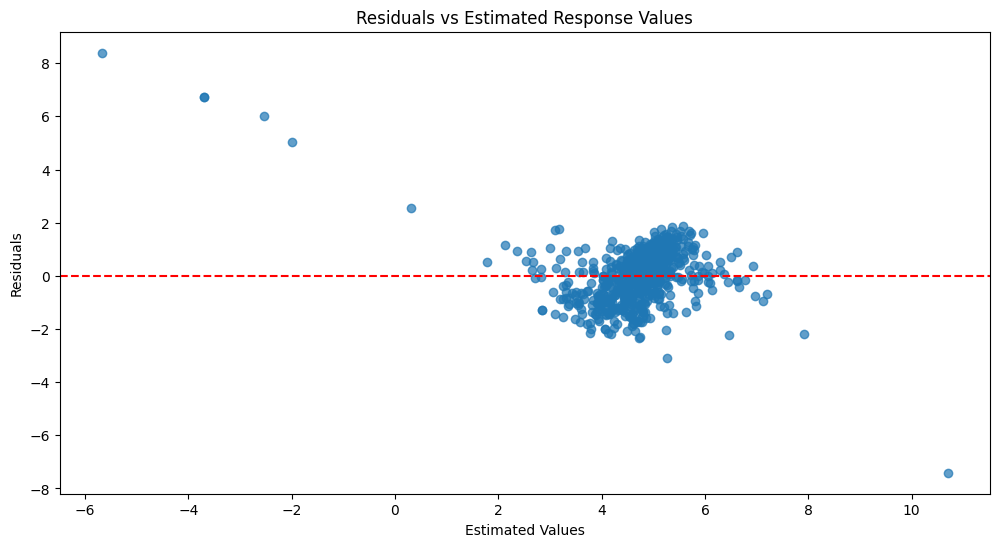

In [23]:
# Residuals vs estimated response values
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Estimated Response Values')
plt.xlabel('Estimated Values')
plt.ylabel('Residuals')
plt.show()

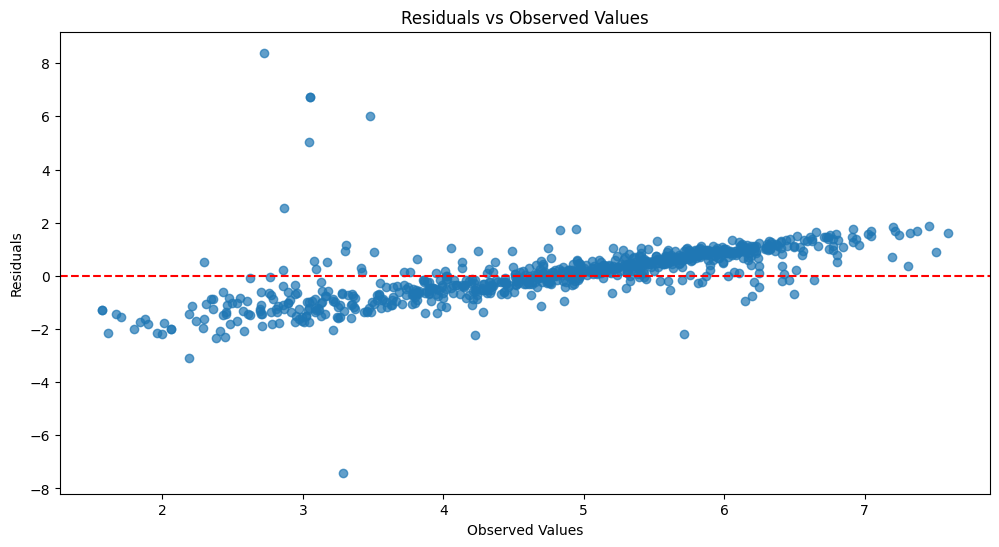

In [24]:
# Residuals vs observations (actual values)
plt.figure(figsize=(12, 6))
plt.scatter(y_test, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Observed Values')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.show()

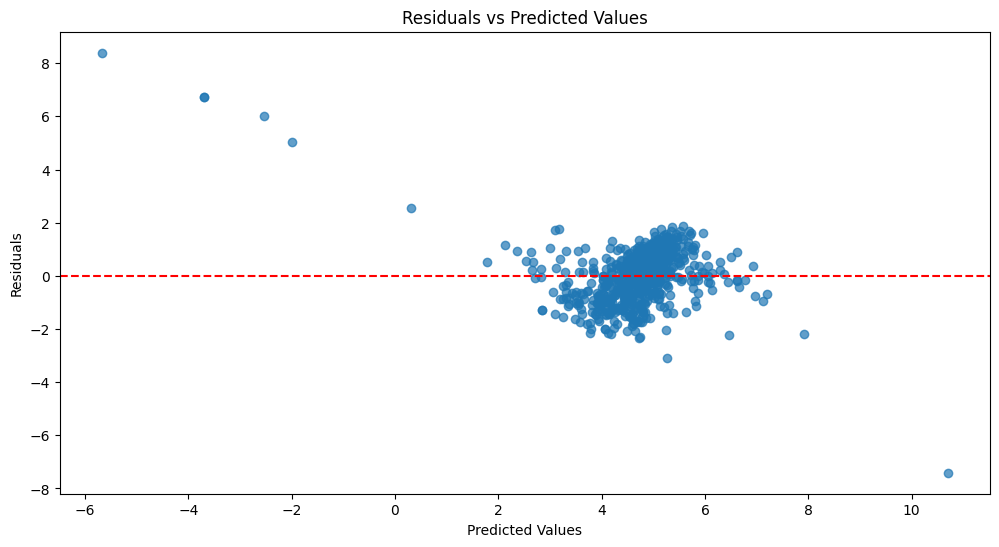

In [25]:
# Residuals vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

-----

#### Pipeline RF

In [26]:
# --- PIPELINE 2: RANDOM FOREST ---
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)), 
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

In [27]:
print("\nTreinando o modelo RandomForestRegressor...")
pipeline_rf.fit(X_train, y_train)
print("Modelo RandomForestRegressor treinado com sucesso.")


Treinando o modelo RandomForestRegressor...


c:\Users\gregorio\TCC-CD-USP\venv\Lib\site-packages\sklearn\impute\_base.py:590: FutureWarning: Currently, when `keep_empty_feature=False` and `strategy="constant"`, empty features are not dropped. This behaviour will change in version 1.8. Set `keep_empty_feature=True` to preserve this behaviour.
  warnings.warn(


Modelo RandomForestRegressor treinado com sucesso.


In [28]:
# 2. Previsões e Métricas (Random Forest)
y_pred_rf = pipeline_rf.predict(X_test)
metrics_rf = {
    'Modelo': 'Random Forest',
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'MAPE (%)': np.mean(np.abs((y_test - y_pred_rf) / (y_test + 1e-6))) * 100,
    'R²': r2_score(y_test, y_pred_rf)
}
metrics_rf_df= pd.DataFrame([metrics_rf])
metrics_rf_df

,Modelo,MAE,MSE,RMSE,MAPE (%),R²
0,Random Forest,0.181146,0.060066,0.245084,4.431349,0.961846
